In [23]:
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sc
import sklearn as sk


In [24]:
data_churn = pd.read_csv("C:/Users/vaish/Downloads/Telecom-Customer-Churn-prediction-main/Telecom-Customer-Churn-prediction-main/data.csv")

In [25]:
#Data information at a glance
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [26]:
#Understanding dataset
data_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [27]:
#Changing data type of Total Charges from object to numeric and identifying null values

data_churn.TotalCharges = pd.to_numeric(data_churn.TotalCharges, errors = 'coerce')
data_churn.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [28]:
# dropping na values
data_churn.dropna(how = 'any', inplace = True)



In [29]:
data_churn.head(489)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,5949-XIKAE,Female,0,Yes,Yes,8,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,83.55,680.05,Yes
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415.00,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No


In [30]:
#Checking if null values are removed
data_churn.loc[data_churn["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [31]:
#Creating dummy values to use categorical values efficintly in analysis
data_churn_dummies = pd.get_dummies(data_churn)
data_churn_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,1,0
2,0,2,53.85,108.15,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,1,0
4,0,2,70.70,151.65,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [32]:
#Exploring contract to undersatnd customer segmentation

data_churn['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [33]:
#Asigning numerical values to contract types
data_churn['Contract'].replace({"Month-to-month": 0, "One year": 1, "Two year":2}, inplace = True)

In [34]:
data_churn['Contract'].value_counts()

0    3875
2    1685
1    1472
Name: Contract, dtype: int64

In [35]:
#MAximum tenure of customers
print(data_churn['tenure']. max())

72


In [36]:
#Creating bins for age groups to create visualization
labels = ["{0} - {1}".format(i, i + 11) for i in range(1,72, 12)]
data_churn['tenure_grp'] = pd.cut(data_churn.tenure, range(1, 80, 12), right=False, labels=labels)

In [37]:
data_churn['tenure_grp'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_grp, dtype: int64

In [38]:
#dropping unnecessary columns like 'customerID' and 'tenure' as they are not needed for analysis.
#This step will make data clean, light and easy to work with.
data_churn.drop(columns= ['customerID','tenure'], axis=1, inplace=True, errors = 'raise')


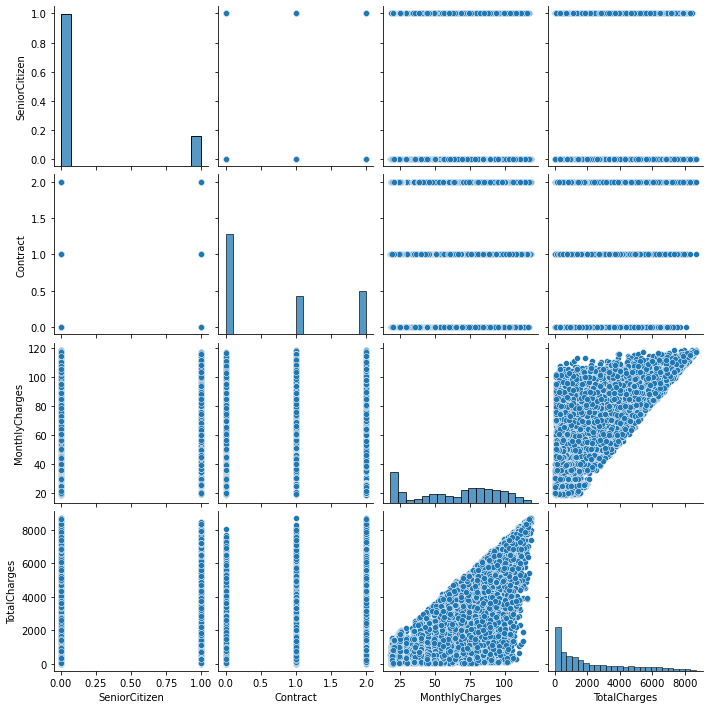

In [39]:
## DATA EXPLORATION

sns.pairplot(data_churn)

In [40]:
# Plotting distribution of individual variables vs churn to understand the distribution using seaborn countplots
#Univariate Analysis


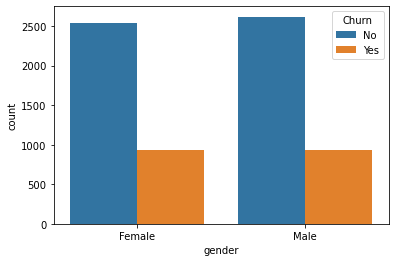

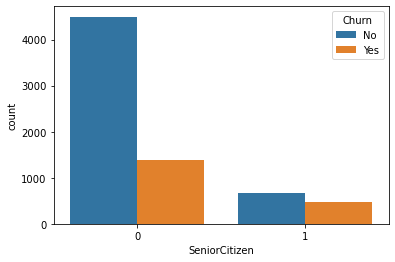

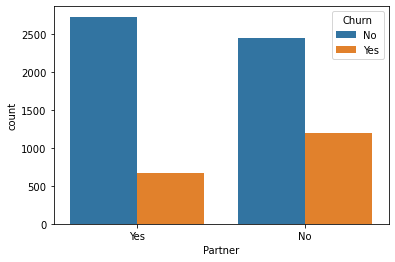

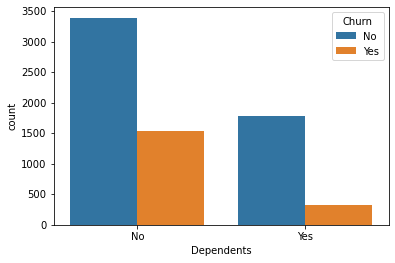

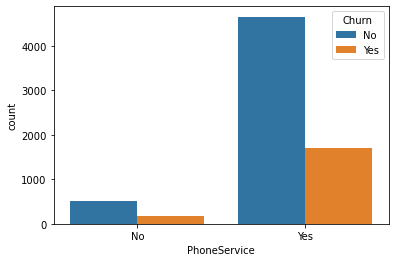

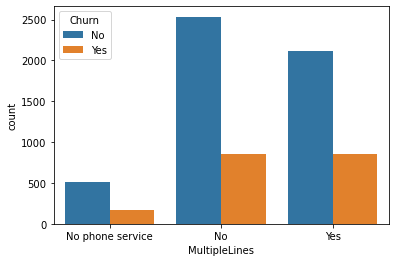

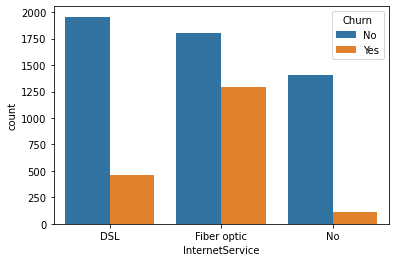

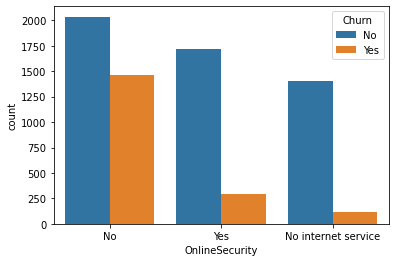

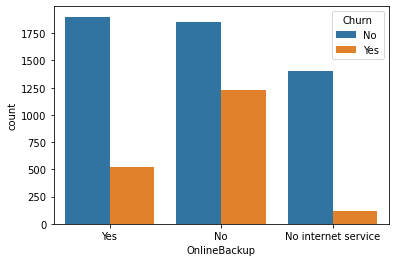

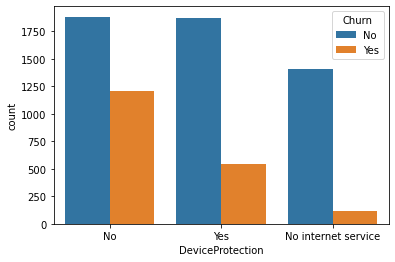

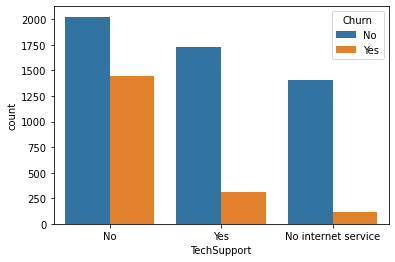

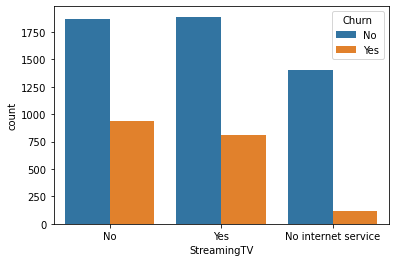

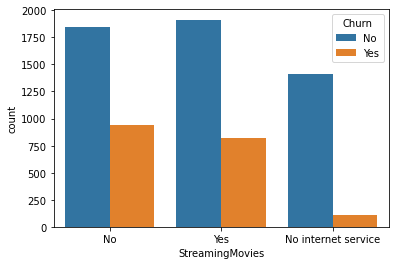

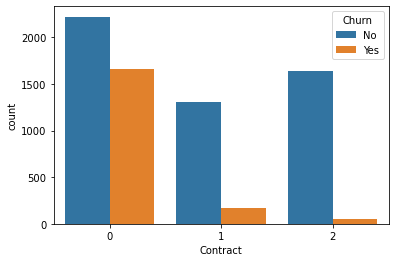

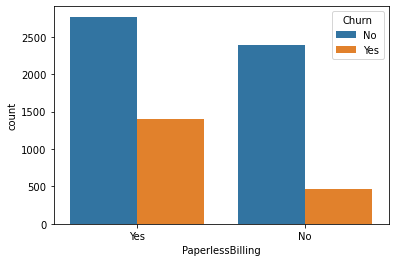

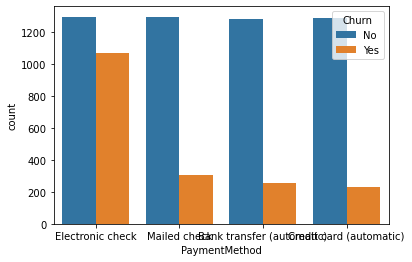

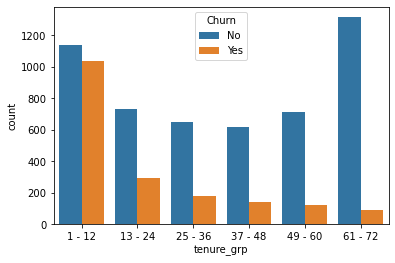

In [41]:
for i, predictor in enumerate(data_churn.drop(columns = ['MonthlyCharges', 'TotalCharges', 'Churn'])):
    plt.figure(i)
    sns.countplot(data = data_churn, x = predictor, hue = 'Churn')
    

In [42]:
# Converting target variable Churn in to a binary variable.

data_churn['Churn'] = np.where(data_churn.Churn == 'Yes',1,0)

In [43]:
data_churn

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grp
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,0,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,1,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,0,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,1,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,1,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,1,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,0,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,0,Yes,Mailed check,74.40,306.60,1,1 - 12


In [44]:
data_churn_dummies = pd.get_dummies(data_churn)
data_churn_dummies.head()

,SeniorCitizen,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,0,1,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,0,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,1,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


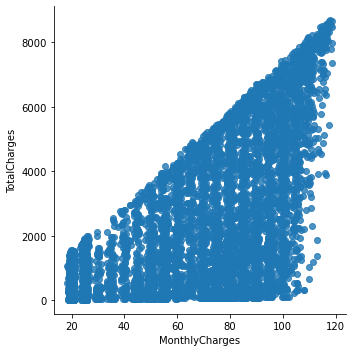

In [45]:
# Scatter plot using Seaborn lmplot between Monthly charges and total charges to see the relationship between both columns.

sns.lmplot(data=data_churn_dummies, x='MonthlyCharges', y= 'TotalCharges', scatter = True, legend=True, fit_reg=False)


Text(0.5, 1.0, 'Churn by Monthly Charges')

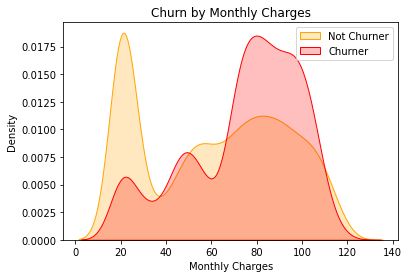

In [46]:
# Chrun by monthly charges and total charges
Month_charge =  sns.kdeplot(data_churn_dummies.MonthlyCharges[(data_churn_dummies['Churn'] == 0)],
                            color = "Orange", shade = True)
Month_charge =  sns.kdeplot(data_churn_dummies.MonthlyCharges[(data_churn_dummies["Churn"] == 1)],
                           color = "Red", shade = True)
Month_charge.legend(["Not Churner", "Churner"], loc = 'upper right')
Month_charge.set_xlabel('Monthly Charges')
Month_charge.set_ylabel('Density')
Month_charge.set_title('Churn by Monthly Charges')


Text(0.5, 1.0, 'Churn by Total Charges')

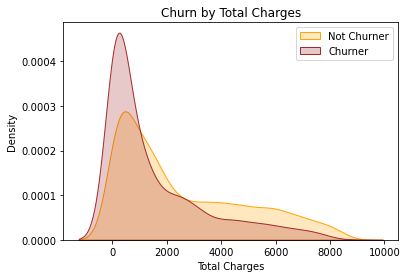

In [47]:
# Chrun by monthly charges and total charges
Total_charge =  sns.kdeplot(data_churn_dummies.TotalCharges[(data_churn_dummies['Churn'] == 0)],
                            color = "Orange", shade = True)
Total_charge =  sns.kdeplot(data_churn_dummies.TotalCharges[(data_churn_dummies["Churn"] == 1)],
                           color = "Brown", shade = True)
Total_charge.legend(["Not Churner", "Churner"], loc = 'upper right')
Total_charge.set_xlabel('Total Charges')
Total_charge.set_ylabel('Density')
Total_charge.set_title('Churn by Total Charges')

<AxesSubplot:>

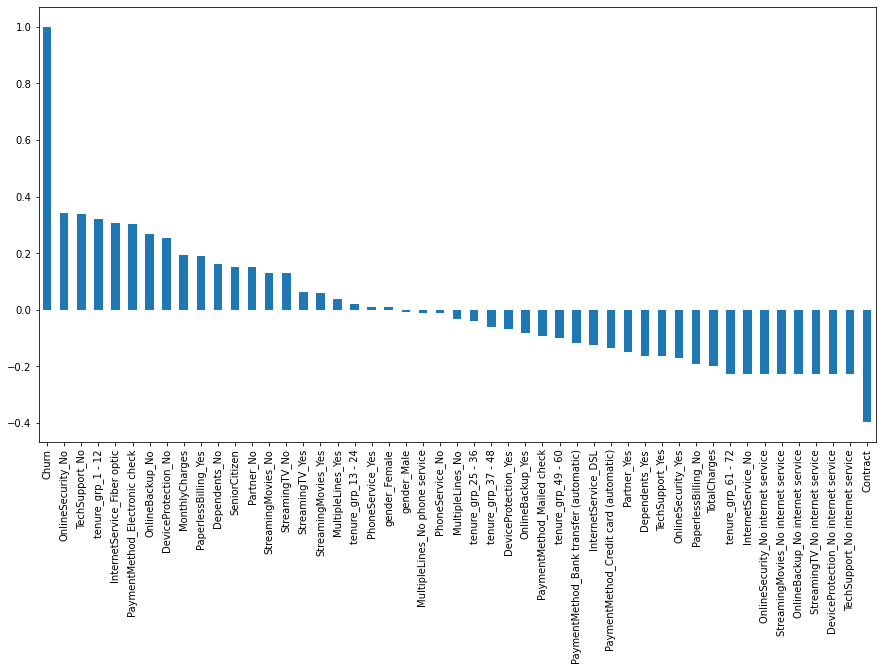

In [48]:
#Exploring correlation for churned customers

plt.figure(figsize=(15,8))

data_churn_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

## Bivariate Analysis

In [49]:
# Bivariate analysis to understand relationship between variables
data_target0=data_churn.loc[data_churn["Churn"]==0]
data_target1=data_churn.loc[data_churn["Churn"]==1]


In [50]:
def uniplot(df, col,  title, hue = None):
    
    sns.set_style('whitegrid')
    sns.set_context('notebook')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams["axes.titlesize"] = 23
    plt.rcParams["axes.titlepad"]= 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 9 + 4*len(temp.unique())
    fig.set_size_inches(width, 8)
    plt.xticks(rotation = 60 )
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x = col, order = df[col].value_counts().index, hue = hue, palette = 'colorblind')
    plt.show

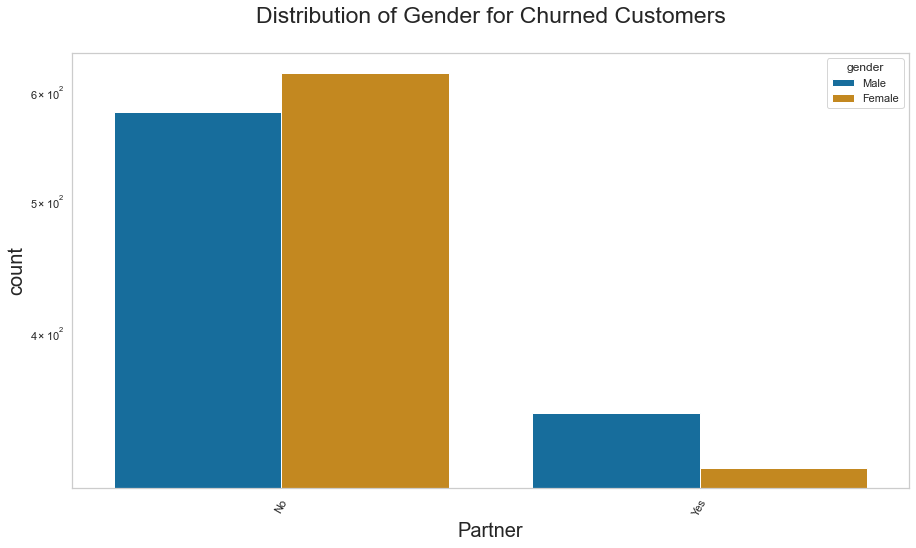

In [51]:
uniplot(data_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

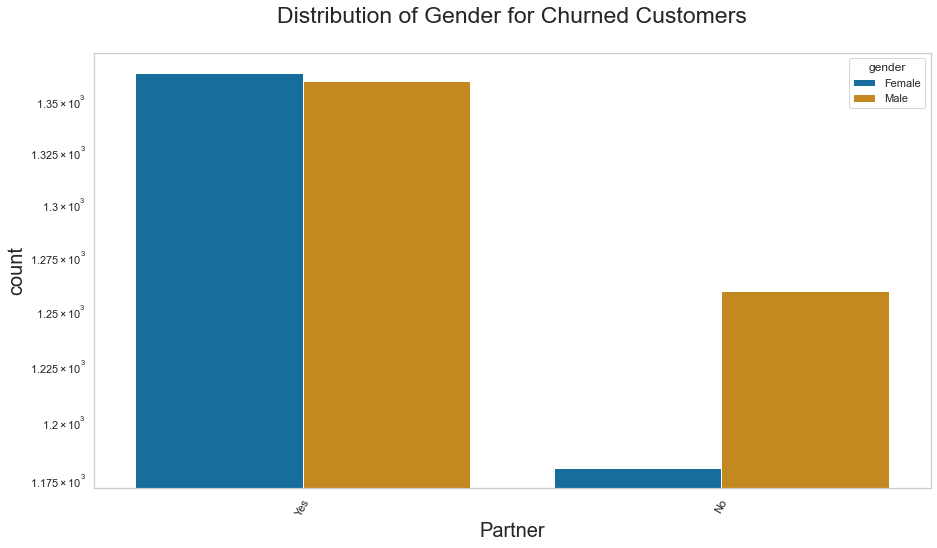

In [52]:
uniplot(data_target0,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

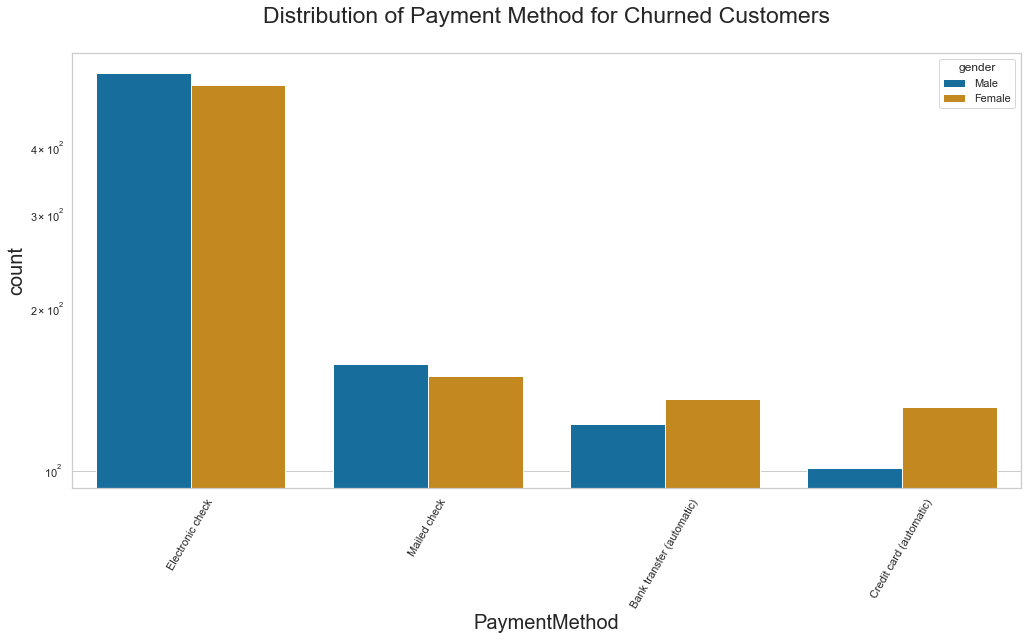

In [53]:
uniplot(data_target1,col='PaymentMethod',title='Distribution of Payment Method for Churned Customers',hue='gender')

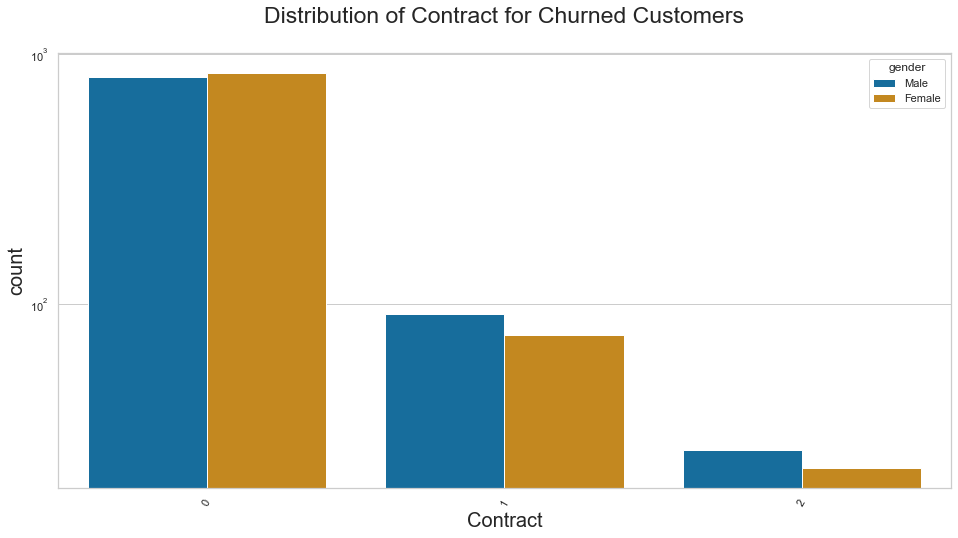

In [54]:
uniplot(data_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

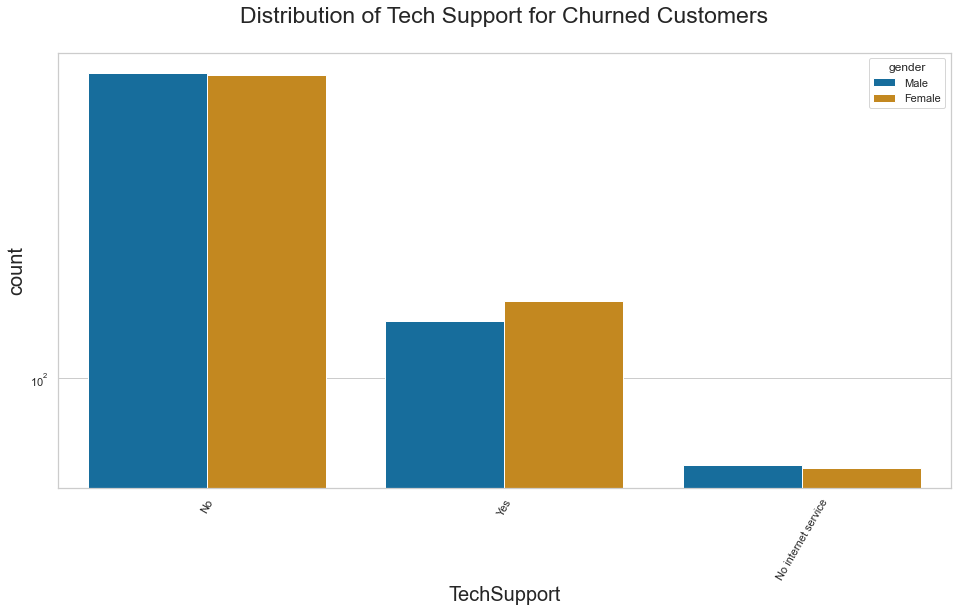

In [55]:
uniplot(data_target1,col='TechSupport',title='Distribution of Tech Support for Churned Customers',hue='gender')

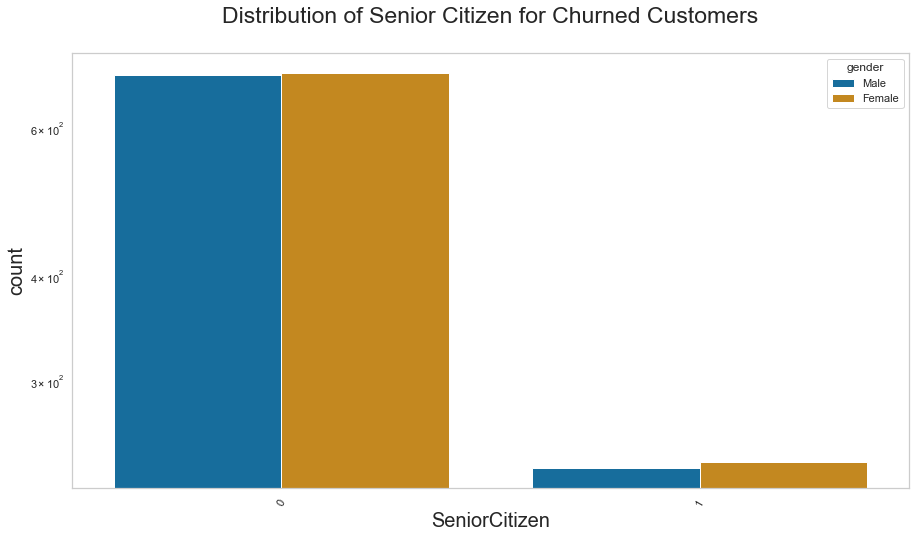

In [56]:
uniplot(data_target1,col='SeniorCitizen',title='Distribution of Senior Citizen for Churned Customers',hue='gender')

Key Insights from bivariate analysis:

Monthly Customers are high likely to churn as they are free from any contract.
Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
Next group of high churners are customers with less features like no online security, No Tech Support.
Non senior customers also high likely fall into churners group.


In [57]:
data_churn_dummies.to_csv('customer_churn.csv')

In [58]:
# MODEL Building for Churn Customers

import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [59]:
data=pd.read_csv("customer_churn.csv")
data.head()

,Unnamed: 0,SeniorCitizen,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,0,0,29.85,29.85,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,56.95,1889.50,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,53.85,108.15,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,1,42.30,1840.75,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,70.70,151.65,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [60]:
data.isnull().sum()

data.head()

,Unnamed: 0,SeniorCitizen,Contract,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,0,0,29.85,29.85,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,56.95,1889.50,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,53.85,108.15,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,1,42.30,1840.75,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,70.70,151.65,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [61]:
x = data.drop('Churn', axis = 1)
x


,Unnamed: 0,SeniorCitizen,Contract,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_grp_1 - 12,tenure_grp_13 - 24,tenure_grp_25 - 36,tenure_grp_37 - 48,tenure_grp_49 - 60,tenure_grp_61 - 72
0,0,0,0,29.85,29.85,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,1,56.95,1889.50,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,53.85,108.15,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,1,42.30,1840.75,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,0,70.70,151.65,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,0,1,84.80,1990.50,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,7039,0,1,103.20,7362.90,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,7040,0,0,29.60,346.45,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
7030,7041,1,0,74.40,306.60,0,1,0,1,1,...,0,0,0,1,1,0,0,0,0,0


In [62]:
y = data['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [63]:
## Train Test split(80%-20%)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [64]:
##Decision tree Classifier Model Training 

model_data=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [65]:
x_test.shape

(1407, 49)

In [66]:
model_data.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [67]:
y_pred=model_data.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [68]:
model_data.score(x_test,y_test)

0.7953091684434968

In [95]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1047
           1       0.64      0.54      0.58       360

    accuracy                           0.81      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



The accuracy is quite low with Decision Tree model, this could be due to imbalanced dataset. It is not advised to consider accuracy as the accuracy is cursed in imbalanced dataset, and we should consider looking recall, precision and F1 score for minority class, those are also low for churned customers. 
We can try calling SMOTEEN (Upsampling + ENN) to see if that improves the accuracy.


In [69]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_sample(x,y)

In [70]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [71]:
model_data_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [72]:
model_data_smote.fit(xr_train,yr_train)
yr_predict = model_data_smote.predict(xr_test)
model_score_r = model_data_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9001019367991845
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       457
           1       0.89      0.93      0.91       524

    accuracy                           0.90       981
   macro avg       0.90      0.90      0.90       981
weighted avg       0.90      0.90      0.90       981



In [121]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[375  51]
 [ 49 512]]


By applying SMOTENN (Upsampling and ENN) the accuracy improved significantly (90%), with good precision, recall and F1 score for minority class which is churned customers.


In [73]:
#Lets explore some other models find the most accurate model for prediction

## Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [74]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [75]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [76]:
y_pred=model_rf.predict(x_test)

In [77]:
model_rf.score(x_test,y_test)

0.8038379530916845

In [78]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1055
           1       0.66      0.45      0.54       352

    accuracy                           0.80      1407
   macro avg       0.75      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



In [79]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_sample(x,y)

In [80]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [81]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [82]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [83]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.8981854838709677
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       411
           1       0.90      0.92      0.91       581

    accuracy                           0.90       992
   macro avg       0.90      0.89      0.89       992
weighted avg       0.90      0.90      0.90       992



In [164]:
yr_train.shape

(3945,)

In [133]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[365  60]
 [ 33 540]]


In [84]:
##With Random Forest Classifier Model, we are are getting 90% accuracy with good F! score, Recall and Precision
#better then Decision Tree model.
#Applying PCA on RAndom Forest Model to see if it improves the model.


In [85]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [86]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

model.fit(xr_train_pca,yr_train1)


RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [87]:
yr_predict_pca = model.predict(xr_test_pca)

In [88]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [89]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.751008064516129
              precision    recall  f1-score   support

           0       0.72      0.66      0.69       411
           1       0.77      0.82      0.79       581

    accuracy                           0.75       992
   macro avg       0.74      0.74      0.74       992
weighted avg       0.75      0.75      0.75       992



In [90]:
# With PCA application, the results were not improved. 
#This suggests that Random Forest Classifier or Decision Tree Models
#are the best for the customer churn analysis for given dataset.

In [91]:
# Model deployment for prediction
# Picking the model

In [92]:
import pickle

In [98]:
filename = 'ccmodel.sav'

In [99]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [100]:
load_ccmodel = pickle.load(open(filename, 'rb'))

In [101]:
ccmodel_score_r1 = load_ccmodel.score(xr_test1, yr_test1)

In [102]:
ccmodel_score_r1

0.8981854838709677

The final model for deployment is Random Forest Classifier with SMOTEENN. 
This model is ready and dumped in ccmodel.sav file format, which can be used to prepare API's to get access from UI.